In [9]:
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Conv1D,MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")



In [11]:
!pip install tensorflow

In [13]:
data =pd.read_csv("CloudWatch_Traffic_Web_Attack.csv")
data.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [19]:
df_unique = data.drop_duplicates()
df_unique['creation_time'] =pd.to_datetime(df_unique['creation_time'])
df_unique['end_time'] = pd.to_datetime(df_unique['end_time'])
df_unique['time'] = pd.to_datetime(df_unique['time'])
df_unique['src_ip_country_code'] =df_unique['src_ip_country_code'].str.upper()
print("Unique Datasets Information:")
df_unique.info()


Unique Datasets Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   creation_time        282 non-null    datetime64[ns, UTC]
 3   end_time             282 non-null    datetime64[ns, UTC]
 4   src_ip               282 non-null    object             
 5   src_ip_country_code  282 non-null    object             
 6   protocol             282 non-null    object             
 7   response.code        282 non-null    int64              
 8   dst_port             282 non-null    int64              
 9   dst_ip               282 non-null    object             
 10  rule_names           282 non-null    object             
 11  observation_name     282 non-null    object            

In [21]:
print("Top 5 Unique Datasets Information:")
df_unique.head()


Top 5 Unique Datasets Information:


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule


In [23]:
df_unique['duration_seconds'] = (df_unique['end_time'] -
df_unique['creation_time']).dt.total_seconds()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_unique[['bytes_in','bytes_out', 'duration_seconds']])


In [27]:
#encoder = OneHotEncoder(sparse=False)
#encoded_features =encoder.fit_transform(df_unique[['src_ip_country_code']])
#scaled_columns = ['scaled_bytes_in', 'scaled_bytes_out','scaled_duration_seconds']
#encoded_columns =encoder.get_feature_names_out(['src_ip_country_code'])from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_unique[['src_ip_country_code']])
scaled_columns = ['scaled_bytes_in', 'scaled_bytes_out', 'scaled_duration_seconds']
encoded_columns = encoder.get_feature_names_out(['src_ip_country_code'])



In [29]:
scaled_df = pd.DataFrame(scaled_features,
columns=scaled_columns, index=df_unique.index)
encoded_df = pd.DataFrame(encoded_features,
columns=encoded_columns, index=df_unique.index)
transformed_df = pd.concat([df_unique, scaled_df, encoded_df],axis=1)
transformed_df.head()


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,...,scaled_bytes_in,scaled_bytes_out,scaled_duration_seconds,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,...,-0.288219,-0.281223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,...,-0.282108,-0.260804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,...,-0.282689,-0.279344,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,...,-0.282197,-0.276161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,...,-0.287996,-0.277678,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
numeric_df = transformed_df.select_dtypes(include=['float64','int64'])
correlation_matrix_numeric = numeric_df.corr()

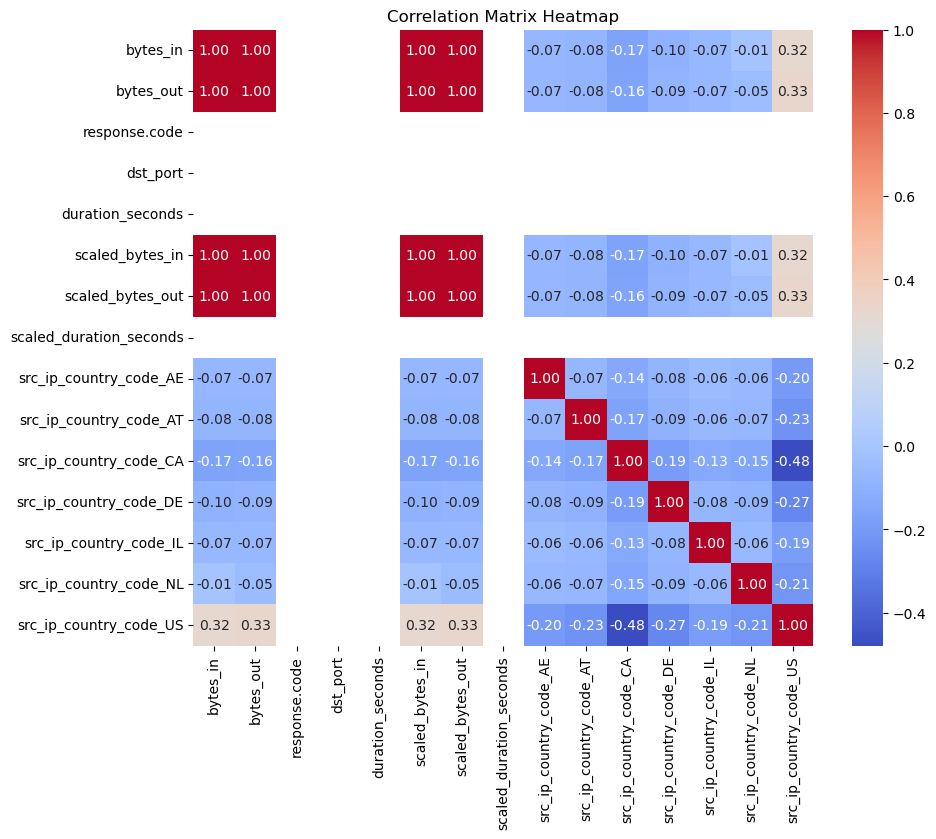

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, fmt=".2f",
cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

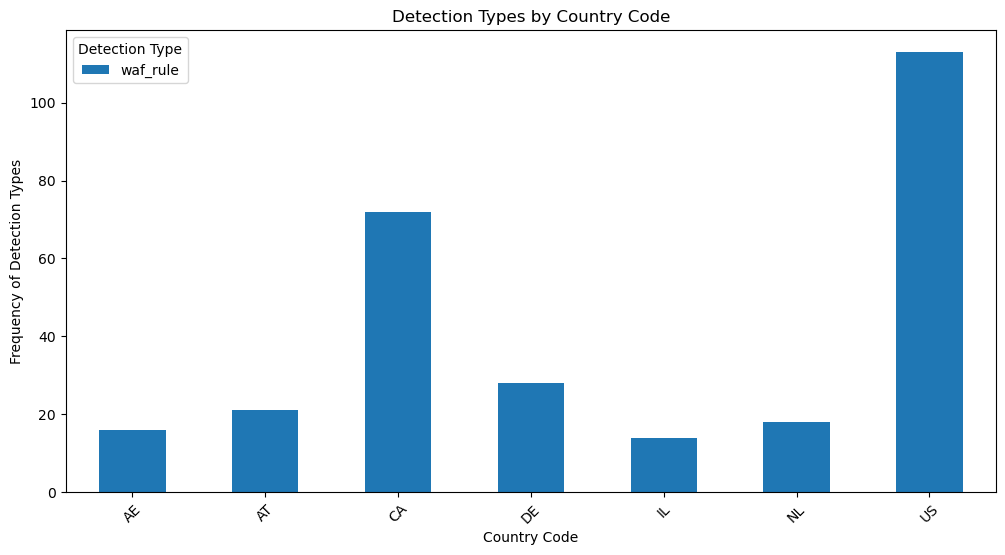

In [41]:
detection_types_by_country =pd.crosstab(transformed_df['src_ip_country_code'],transformed_df['detection_types'])
detection_types_by_country.plot(kind='bar', stacked=True,figsize=(12, 6))
plt.title('Detection Types by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Frequency of Detection Types')
plt.xticks(rotation=45)
plt.legend(title='Detection Type')
plt.show()


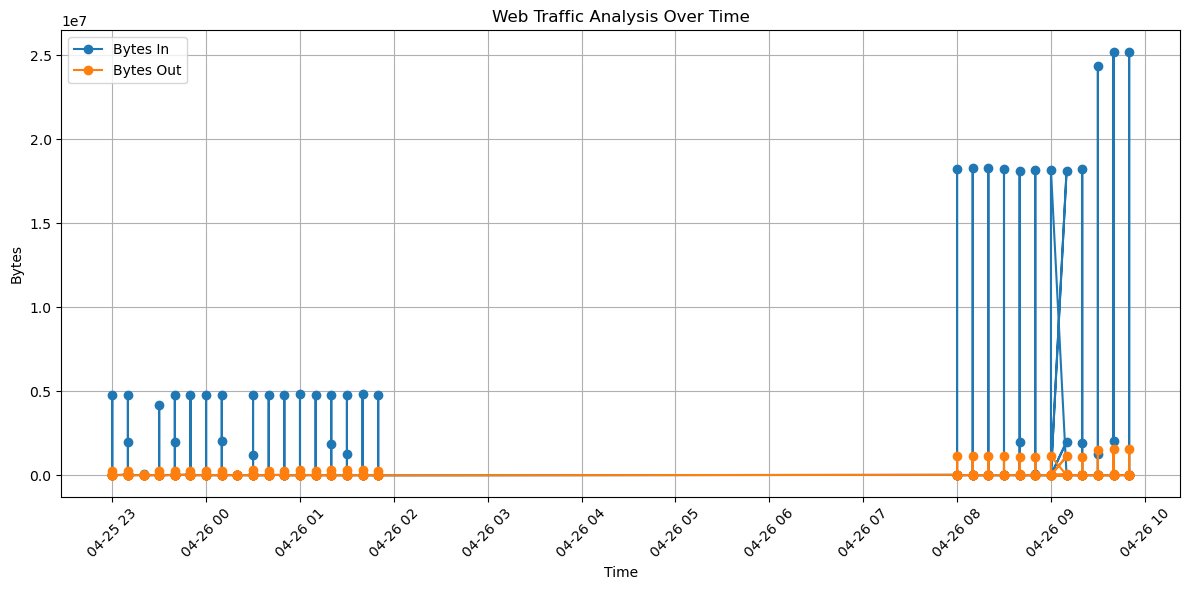

In [43]:
data['creation_time'] = pd.to_datetime(data['creation_time'])
data.set_index('creation_time', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['bytes_in'], label='Bytes In',marker='o')
plt.plot(data.index, data['bytes_out'], label='Bytes Out',marker='o')
plt.title('Web Traffic Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


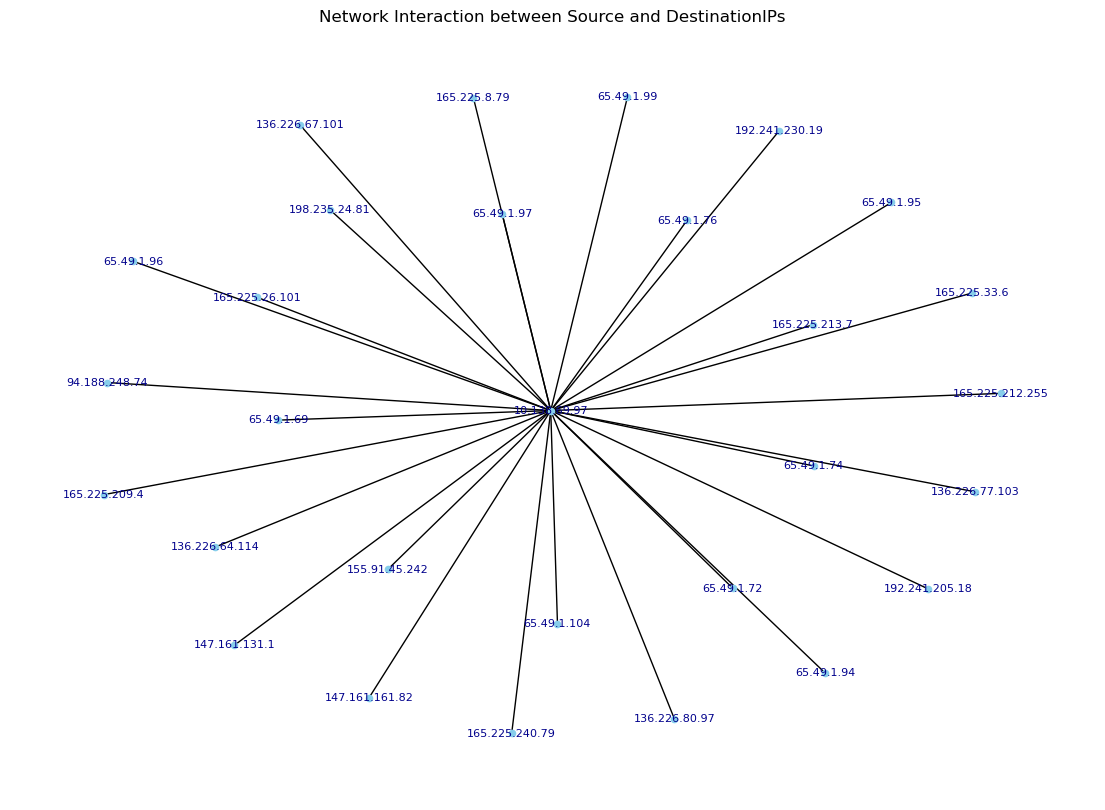

In [47]:
G = nx.Graph()
for idx, row in data.iterrows():
    G.add_edge(row['src_ip'], row['dst_ip'])
plt.figure(figsize=(14, 10))
nx.draw_networkx(G, with_labels=True, node_size=20,
font_size=8, node_color='skyblue', font_color='darkblue')
plt.title('Network Interaction between Source and DestinationIPs')
plt.axis('off')
plt.show()

In [49]:
transformed_df['is_suspicious'] =(transformed_df['detection_types'] == 'waf_rule').astype(int)
X = transformed_df[['bytes_in', 'bytes_out','scaled_duration_seconds']] 
y = transformed_df['is_suspicious']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)


In [51]:
print("Model Accuracy: ",accuracy)

Model Accuracy:  1.0


In [53]:
print("Classification Report: ",classification)


Classification Report:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        85

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



In [57]:
data['is_suspicious'] = (data['detection_types'] =='waf_rule').astype(int)

X = data[['bytes_in', 'bytes_out']].values 

y = data['is_suspicious'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = Sequential([
Dense(8, activation='relu',
input_shape=(X_train_scaled.shape[1],)),
Dense(16, activation='relu'),
Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy',
metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=10,batch_size=8, verbose=1)
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1772 - loss: 0.7605 
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9205 - loss: 0.6800
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9754 - loss: 0.6320
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.5882
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.5332
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.4816
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.4236
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3599
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.2915
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.2351
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.1885 
Test Accuracy: 100.00%


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6519 - loss: 0.6559 - val_accuracy: 1.0000 - val_loss: 0.5664
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.5907 - val_accuracy: 1.0000 - val_loss: 0.4917
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.5091 - val_accuracy: 1.0000 - val_loss: 0.4191
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.4306 - val_accuracy: 1.0000 - val_loss: 0.3424
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.3437 - val_accuracy: 1.0000 - val_loss: 0.2645
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.2754 - val_accuracy: 1.0000 - val_loss: 0.1911
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.1970 - val_accuracy: 1.0000 - val_loss: 0.1291
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.1407 - val_accuracy: 1.0000 - val_loss: 0.0826


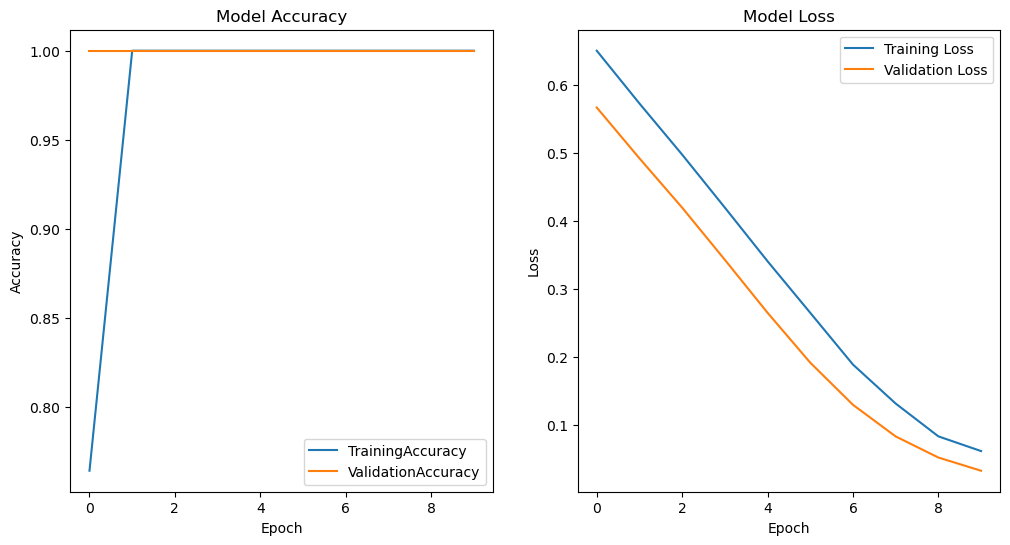

In [59]:
model = Sequential([
Dense(128, activation='relu',input_shape=(X_train_scaled.shape[1],)),Dropout(0.5),
Dense(128, activation='relu'),
Dropout(0.5),
Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(), loss='binary_crossentropy',
metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=10,
batch_size=32, verbose=1, validation_split=0.2)
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='TrainingAccuracy')
plt.plot(history.history['val_accuracy'], label='ValidationAccuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1,
X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1,
X_test.shape[-1])).reshape(X_test.shape)
model = Sequential([
Conv1D(32, kernel_size=1, activation='relu',
input_shape=(X_train_scaled.shape[1], 1)),
Flatten(),
Dense(64, activation='relu'),
Dropout(0.5),
Dense(1, activation='sigmoid')
])


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.2479 - loss: 0.7113 - val_accuracy: 0.9000 - val_loss: 0.6832
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8955 - loss: 0.6728 - val_accuracy: 1.0000 - val_loss: 0.6203
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9551 - loss: 0.6263 - val_accuracy: 1.0000 - val_loss: 0.5668
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.5793 - val_accuracy: 1.0000 - val_loss: 0.5225
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.5387 - val_accuracy: 1.0000 - val_loss: 0.4815
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.5063 - val_accuracy: 1.0000 - val_loss: 0.4387
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.4604 - val_accuracy: 1.0000 - val_loss: 0.3941
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.4100 - val_accuracy: 1.0000 - val_loss: 0.3475


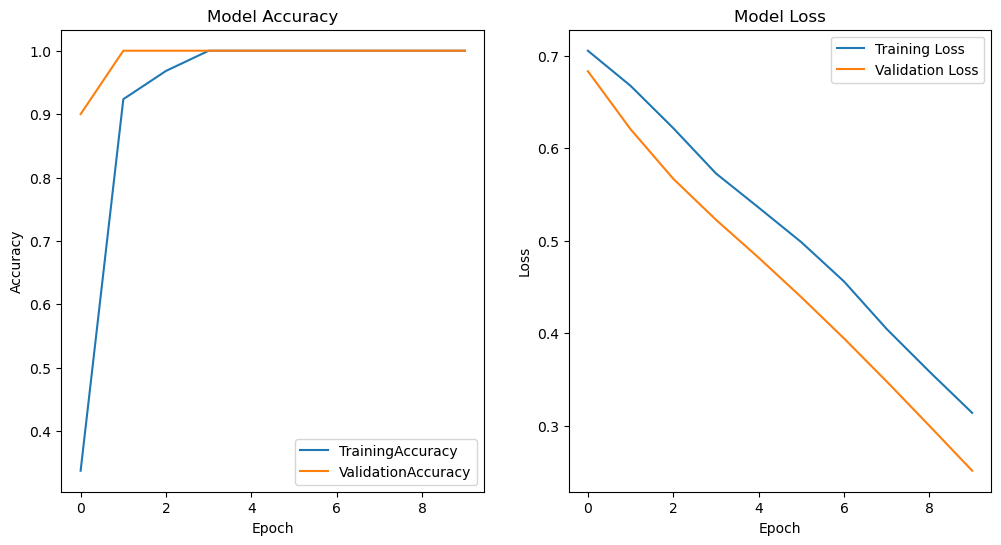

In [63]:
model.compile(optimizer=Adam(), loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=10,
batch_size=32, verbose=1, validation_split=0.2)
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='TrainingAccuracy')
plt.plot(history.history['val_accuracy'], label='ValidationAccuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
